In [39]:
#Import libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Clean up the data
LOOK_AHEAD = 24
data = pd.read_csv("../XAGEUR XAGUSD EURUSD Triangular Exchange Rates.csv")
data["Target"] = data["XAGUSD Close"].shift(-LOOK_AHEAD) - data["XAGUSD Close"]
data["XAGEUR Target"] = data["XAGEUR Close"].shift(-LOOK_AHEAD) - data["XAGEUR Close"]
data["EURUSD Target"] = data["EURUSD Close"].shift(-LOOK_AHEAD) - data["EURUSD Close"]
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data

Time  XAGUSD Open  XAGUSD High  XAGUSD Low  \
0      2020.01.24 21:00:00       18.106       18.115      18.094   
1      2020.01.26 23:00:00       18.257       18.340      18.195   
2      2020.01.27 00:00:00       18.210       18.235      18.165   
3      2020.01.27 01:00:00       18.217       18.263      18.213   
4      2020.01.27 02:00:00       18.255       18.270      18.237   
...                    ...          ...          ...         ...   
29970  2025.03.03 05:00:00       31.287       31.287      31.154   
29971  2025.03.03 06:00:00       31.224       31.287      31.170   
29972  2025.03.03 07:00:00       31.241       31.257      31.116   
29973  2025.03.03 08:00:00       31.188       31.348      31.165   
29974  2025.03.03 09:00:00       31.344       31.431      31.324   

       XAGUSD Close  XAGEUR Open  XAGEUR High  XAGEUR Low  XAGEUR Close  \
0            18.097       15.925       15.978      15.925        15.976   
1            18.211       15.977       15.990      15.975        15.977   
2            18.217       15.977       16.030      15.974        16.006   
3            18.256       16.007       16.052      15.997        16.020   
4            18.254       16.020       16.056      16.019        16.029   
...             ...          ...          ...         ...           ...   
29970        31.223       30.038       30.038      29.924        29.986   
29971        31.242       29.983       30.037      29.949        30.020   
29972        31.187       30.020       30.036      29.903        29.974   
29973        31.340       29.974       30.151      29.954        30.135   
29974        31.408       30.135       30.165      30.085        30.121   

       EURUSD Open  ...     H / L  Log Open Growth  Log High Grwoth  \
0          1.08409  ...  1.002268         0.000240        -0.000575   
1          1.08384  ...  1.013596         0.003607         0.005361   
2          1.08332  ...  1.002198        -0.001119        -0.002494   
3          1.08237  ...  1.005395         0.000167         0.000666   
4          1.08024  ...  1.003130         0.000905         0.000166   
...            ...  ...       ...              ...              ...   
29970      1.04143  ...  1.001216         0.000056        -0.000541   
29971      1.04083  ...  1.004269        -0.000875         0.000000   
29972      1.04056  ...  1.002791         0.000236        -0.000417   
29973      1.04011  ...  1.007456        -0.000737         0.001263   
29974      1.04275  ...  1.008535         0.002167         0.001148   

       Log Low Growth  Log Close Grwoth  Sin H / L  Cos O / C  Target  \
0            0.000480         -0.000216   0.842097   0.539884  -0.009   
1            0.002417          0.002727   0.845750   0.538175  -0.093   
2           -0.000717          0.000143   0.843547   0.540626  -0.138   
3            0.001146          0.000929   0.842951   0.542099  -0.177   
4            0.000572         -0.000048   0.842447   0.540256  -0.207   
...               ...               ...        ...        ...     ...   
29970       -0.001322         -0.000889   0.843770   0.538576   0.468   
29971        0.000223          0.000264   0.843493   0.540787   0.452   
29972       -0.000753         -0.000765   0.843911   0.538844   0.568   
29973        0.000683          0.002125   0.844629   0.544377   0.534   
29974        0.002210          0.000941   0.843312   0.542016   0.420   

       XAGEUR Target  EURUSD Target  
0              0.077       -0.00457  
1              0.107       -0.00405  
2              0.090       -0.00245  
3              0.076       -0.00090  
4              0.064        0.00125  
...              ...            ...  
29970          0.239        0.00776  
29971          0.178        0.00874  
29972          0.216        0.01176  
29973          0.179        0.00847  
29974          0.155        0.00693  

[29975 rows x 42 columns]

In [41]:
#Drop the dates corresponding to our backtest
_    = data.iloc[-((24 * 365) - 896):,:]
#Keep the dates before our backtest
data = data.iloc[:-((24 * 365) - 896),:]
data

Time  XAGUSD Open  XAGUSD High  XAGUSD Low  \
0      2020.01.24 21:00:00       18.106       18.115      18.094   
1      2020.01.26 23:00:00       18.257       18.340      18.195   
2      2020.01.27 00:00:00       18.210       18.235      18.165   
3      2020.01.27 01:00:00       18.217       18.263      18.213   
4      2020.01.27 02:00:00       18.255       18.270      18.237   
...                    ...          ...          ...         ...   
22106  2023.10.31 18:00:00       22.825       22.854      22.730   
22107  2023.10.31 19:00:00       22.843       22.882      22.837   
22108  2023.10.31 20:00:00       22.872       22.882      22.828   
22109  2023.10.31 22:00:00       22.778       22.859      22.778   
22110  2023.10.31 23:00:00       22.843       22.850      22.821   

       XAGUSD Close  XAGEUR Open  XAGEUR High  XAGEUR Low  XAGEUR Close  \
0            18.097       15.925       15.978      15.925        15.976   
1            18.211       15.977       15.990      15.975        15.977   
2            18.217       15.977       16.030      15.974        16.006   
3            18.256       16.007       16.052      15.997        16.020   
4            18.254       16.020       16.056      16.019        16.029   
...             ...          ...          ...         ...           ...   
22106        22.843       21.800       21.841      21.782        21.833   
22107        22.872       21.833       21.863      21.792        21.818   
22108        22.844       21.818       21.822      21.644        21.665   
22109        22.843       21.665       21.903      21.632        21.870   
22110        22.834       21.870       21.967      21.824        21.861   

       EURUSD Open  ...     H / L  Log Open Growth  Log High Grwoth  \
0          1.08409  ...  1.002268         0.000240        -0.000575   
1          1.08384  ...  1.013596         0.003607         0.005361   
2          1.08332  ...  1.002198        -0.001119        -0.002494   
3          1.08237  ...  1.005395         0.000167         0.000666   
4          1.08024  ...  1.003130         0.000905         0.000166   
...            ...  ...       ...              ...              ...   
22106      1.09026  ...  1.002896        -0.001273        -0.001177   
22107      1.09104  ...  1.006687         0.000342         0.000532   
22108      1.09082  ...  1.001970         0.000551         0.000000   
22109      1.09138  ...  1.001358        -0.001789        -0.000437   
22110      1.09176  ...  1.003161         0.001238        -0.000171   

       Log Low Growth  Log Close Grwoth  Sin H / L  Cos O / C  Target  \
0            0.000480         -0.000216   0.842097   0.539884  -0.009   
1            0.002417          0.002727   0.845750   0.538175  -0.093   
2           -0.000717          0.000143   0.843547   0.540626  -0.138   
3            0.001146          0.000929   0.842951   0.542099  -0.177   
4            0.000572         -0.000048   0.842447   0.540256  -0.207   
...               ...               ...        ...        ...     ...   
22106       -0.001107          0.000342   0.844406   0.540965   0.035   
22107        0.002040          0.000551   0.842534   0.541369  -0.035   
22108       -0.000171         -0.000532   0.842747   0.539271   0.138   
22109       -0.000952         -0.000019   0.843387   0.542695   0.199   
22110        0.000819         -0.000171   0.842157   0.539971   0.112   

       XAGEUR Target  EURUSD Target  
0              0.077       -0.00457  
1              0.107       -0.00405  
2              0.090       -0.00245  
3              0.076       -0.00090  
4              0.064        0.00125  
...              ...            ...  
22106         -0.353        0.00013  
22107         -0.214       -0.00009  
22108         -0.074       -0.00059  
22109         -0.223        0.00011  
22110         -0.279       -0.00202  

[22111 rows x 42 columns]

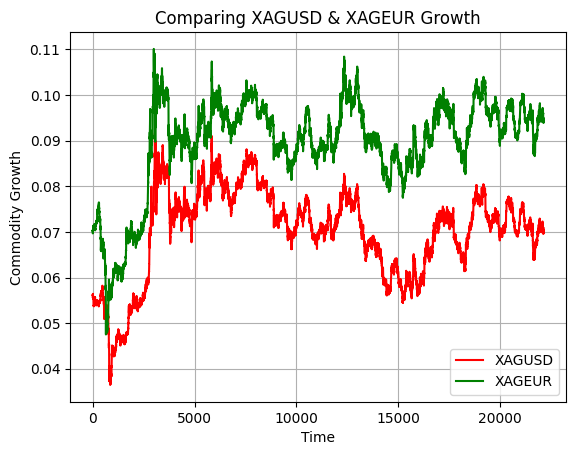

In [12]:
plt.title("Comparing XAGUSD & XAGEUR Growth")
plt.plot((data['XAGUSD Close'] / data.loc[0,"XAGUSD Close"]) / (data['XAGUSD Close'].max() - data['XAGUSD Close'].min()),color="red")
plt.plot((data['XAGEUR Close'] / data.loc[0,"XAGEUR Close"]) / (data['XAGEUR Close'].max() - data['XAGEUR Close'].min()),color="green")
plt.ylabel("Commodity Growth")
plt.xlabel("Time")
plt.legend(["XAGUSD","XAGEUR"])
plt.grid()

In [38]:
X = data.iloc[:,1:-1].columns
y = "Target"

In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorTypea
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
model = GradientBoostingRegressor()
model.fit(data.loc[:,["XAGUSD Open","XAGUSD High","XAGUSD Low","XAGUSD Close"]],data.loc[:,y])
initial_types = [("float_input",FloatTensorType([1,4]))]
xagusd_model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)
onnx.save(xagusd_model_proto,"../XAGUSD State Model.onnx")

In [52]:
model = GradientBoostingRegressor()
model.fit(data.loc[:,["XAGEUR Open","XAGEUR High","XAGEUR Low","XAGEUR Close"]],data.loc[:,"XAGEUR Target"])
initial_types = [("float_input",FloatTensorType([1,4]))]
xageur_model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)
onnx.save(xageur_model_proto,"../XAGEUR State Model.onnx")

In [53]:
model = GradientBoostingRegressor()
model.fit(data.loc[:,["EURUSD Open","EURUSD High","EURUSD Low","EURUSD Close"]],data.loc[:,"EURUSD Target"])
initial_types = [("float_input",FloatTensorType([1,4]))]
eurusd_model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)
onnx.save(eurusd_model_proto,"../EURUSD State Model.onnx")

In [47]:
data.columns

Index(['Time', 'XAGUSD Open', 'XAGUSD High', 'XAGUSD Low', 'XAGUSD Close',
       'XAGEUR Open', 'XAGEUR High', 'XAGEUR Low', 'XAGEUR Close',
       'EURUSD Open', 'EURUSD High', 'EURUSD Low', 'EURUSD Close',
       'Open Squared', 'High Squared', 'Low Squared', 'Close Squared',
       'Open Cubed', 'High Cubed', 'Low Cubed', 'Close Cubed',
       'Open Squre Root', 'High Square Root', 'Low Square Root',
       'Close Square Root', 'Open Growth', 'High Growth', 'Low Grwoth',
       'Close Growth', 'O / H', 'O / L', 'O / C', 'H / L', 'Log Open Growth',
       'Log High Grwoth', 'Log Low Growth', 'Log Close Grwoth', 'Sin H / L',
       'Cos O / C', 'Target', 'XAGEUR Target', 'EURUSD Target'],
      dtype='object')